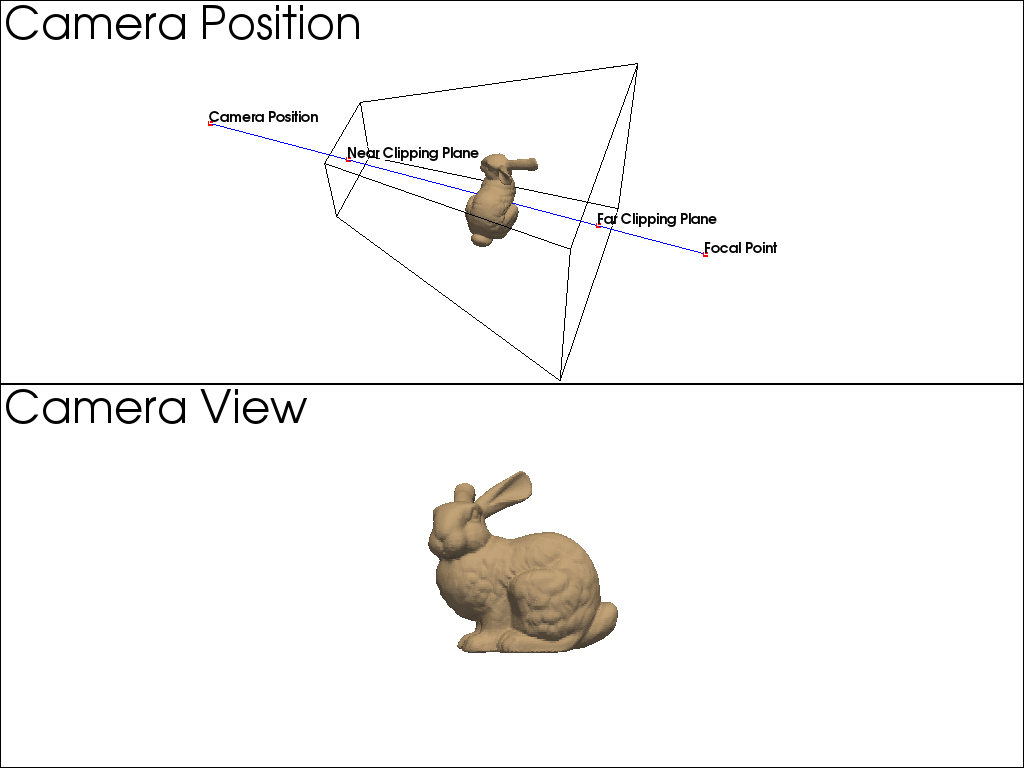

In [1]:
import pyvista as pv
import numpy as np
import vtk
from pyvista import examples

pv.set_plot_theme("document")

camera = pv.Camera()
near_range = 0.3
far_range = 0.8
camera.clipping_range = (near_range, far_range)
unit_vector = np.array(camera.direction) / np.linalg.norm(
    np.array([camera.focal_point]) - np.array([camera.position])
)

frustum = camera.view_frustum(1.0)

position = camera.position
focal_point = camera.focal_point
line = pv.Line(position, focal_point)

bunny = examples.download_bunny()
xyz = camera.position + unit_vector * 0.6 - np.mean(bunny.points, axis=0)
bunny.translate(xyz)

p = pv.Plotter(shape=(2, 1))
p.subplot(0, 0)
p.add_text("Camera Position")
p.add_mesh(bunny)
p.add_mesh(frustum, style="wireframe")
p.add_mesh(bunny)
p.add_mesh(line, color="b")
p.add_point_labels(
    [
        position,
        camera.position + unit_vector * near_range,
        camera.position + unit_vector * far_range,
        focal_point,
    ],
    ["Camera Position", "Near Clipping Plane", "Far Clipping Plane", "Focal Point"],
    margin=0,
    fill_shape=False,
    font_size=14,
    shape_color="white",
    point_color="red",
    text_color="black",
)
p.camera.position = (1.1, 1.5, 0.0)
p.camera.focal_point = (0.2, 0.3, 0.3)
p.camera.up = (0.0, 1.0, 0.0)
p.camera.zoom(1.4)

p.subplot(1, 0)
p.add_text("Camera View")
p.add_mesh(bunny)
p.camera = camera
p.show()